### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Investigating data for problematic data entails several steps:
 - Identifying duplicates, and determining if they are true duplicates or just records with similarity of available attributes
 - Finding missing values, if they are appropriate, and how to handle them
 - Addressing the missing values, if applicable
 - Examine outliers

#### Duplicates

In [4]:
# look for duplicate data
# Although, with so few attributes and no unique key, it is possible that
# that these are still different people. nonetheless it is useful to know
duplicates = data[data.duplicated()]

print(f'Duplicates: {duplicates.shape[0]}')


Duplicates: 74


In [5]:
duplicates

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


While  we did identify some "duplicates", we should consider the event that occurs with each record, and determine if it's possible that two records can have the same attributes while not being "true" duplicates.

Here, there's no unique identifier, and any of the attributes could reasonably be the same across multiple instances of the coupon being sent--surely, there are many males driving alone to work on a Sunny Day at 7AM... etc. Also, each observation is an event--it's possible that any "duplicate" could be the same coupon being sent to the same person on different days.

Given there's no clear proof of duplication, we should assume that data collection was thorough and clean, and trust that each row is a distinct event.

#### Missing Data

In [6]:
# find any missing values. decide whether to drop these or include them
nulls = data.isnull()
nulls_cnt = nulls.sum()
missing = nulls_cnt[nulls_cnt > 0]
missing.loc['Total Missing']=missing.sum(numeric_only=True)
missing = pd.DataFrame({'Column': missing.index, 'Count': missing.values})

# print total rows, for context
print(f'Total observations in dataset: {data.shape[0]}')
missing['% Missing of Total Rows'] = round(missing['Count'] / data.shape[0]*100,2)
missing['% Missing of Total Rows'] = missing['% Missing of Total Rows'].apply(lambda x: '{:.1f}%'.format(x))

# this line is to simply add a blank value in the cell, because a total of this column
# doesn't make sense in this context
missing.loc[missing['Column']=='Total Missing', '% Missing of Total Rows'] = ' '

print(f'\nCount of missing values by column type: ')
missing

Total observations in dataset: 12684

Count of missing values by column type: 


,Column,Count,% Missing of Total Rows
0,car,12576,99.2%
1,Bar,107,0.8%
2,CoffeeHouse,217,1.7%
3,CarryAway,151,1.2%
4,RestaurantLessThan20,130,1.0%
5,Restaurant20To50,189,1.5%
6,Total Missing,13370,


Interesting! There are many missing values in the dataset, especially in the "car" field.

The second column in the table above is the % of missing values per column, as a <b>% of the number of observations in the data set.</b> That means that 99.2% of the observations are missing a value for car.


3. Decide what to do about your missing data -- drop, replace, other...

There are too many records that are missing car data to remove the records--we wouldn't have much data leftover to do any analysis. Is that acceptable in our context? I would think yes--vehicle intuitively doesn't seem to have any influence on this likelihood of coupon acceptance, except as an unreliable proxy for income (and anyway, we already have income).

Let's fill in all of the null car values, and then drop the remaining records with null values, because the remaining columns might be useful to our analysis, and we don't want to skew numbers due to the presence of null values.

In [7]:
# for nulls, we should replace or drop some of these

# these are all driving scenarios, though some car model is not present. 
# we should tag null values with a valid value, like N/A
data['car'] = data['car'].fillna('N/A')
data['car']

# the other attributes with nulls are very important and might be useful in linear regression
# we should keep drop records with NaNs--we still have enough data without them to
# do the regression

data.dropna(inplace=True)

#### Outliers

Because we are just counting by categorical data, and not working with many numeric metrics, outlier analysis is not really needed.

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
# find the acceptance rate and format it
acceptance_rates = pd.DataFrame(round(data['Y'].value_counts(normalize=True)*100,2).apply(lambda x: '{:.1f}%'.format(x)))
acceptance_rates

,Y
1,56.9%
0,43.1%


56.9% of the people receiving the people receiving the coupon accepted it.

5. Use a bar plot to visualize the `coupon` column.

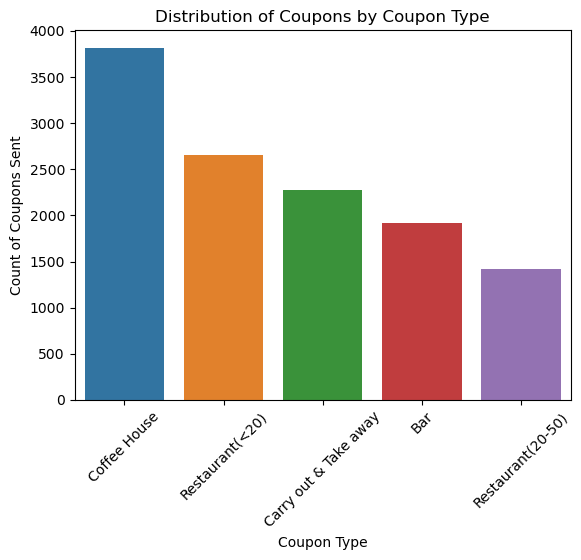

In [9]:
coupons = data['coupon']
coupon_counts = coupons.value_counts().reset_index()

sns.barplot(data=coupon_counts, x='index', y='coupon')
plt.title('Distribution of Coupons by Coupon Type')
plt.ylabel('Count of Coupons Sent')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.show()

Most coupons sent were for coffee houses, while the fewest were sent to expensive restaurants.
Not surprising, as people usually plan ahead for expensive restaurants and might not want to deviate from their current plans for a big meal.

6. Use a histogram to visualize the temperature column.

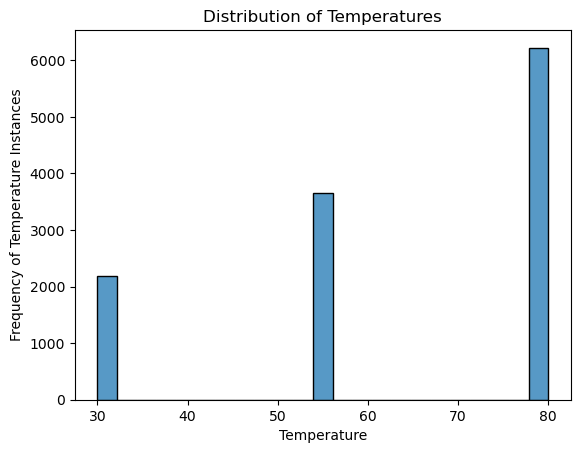

In [10]:
temperature = data['temperature']
temperature_counts = temperature.value_counts()
# print(temperature_counts)

sns.histplot(temperature)

plt.title('Distribution of Temperatures')
plt.ylabel('Frequency of Temperature Instances')
plt.xlabel('Temperature')
plt.show()

It's interesting that the temperatures are plotted in just three buckets. It seems possible, even likely, that the data was captured on 3 separate days. The large range also suggests a different climate or different season, two factors that are not captured in the data. There's not much else to takeaway from this plot

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
bar_coupons = data[data['coupon']=='Bar']



2. What proportion of bar coupons were accepted?


In [12]:
bar_accepted = bar_coupons[bar_coupons['Y']==1]
bar_rejected = bar_coupons[bar_coupons['Y']==0]

# acceptance_rate = (data['Y']==1)
bar_acceptance_rate = bar_accepted.shape[0] / bar_coupons.shape[0]
print(f'{round(bar_acceptance_rate*100,1)}%')

41.2%


Interestingly, this is less than the overall acceptance rate of 56.9% we discovered earlier.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
lt4 = ['never', '1~3']

bar_coupons_lt4 = bar_coupons[bar_coupons['Bar'].isin(lt4)]
bar_coupons_ge4 = bar_coupons[~bar_coupons['Bar'].isin(lt4)]

lt4_accepted = bar_coupons_lt4[bar_coupons_lt4['Y']==1]
ge4_accepted = bar_coupons_ge4[bar_coupons_ge4['Y']==1]

lt4_acceptance_rate = lt4_accepted.shape[0] / bar_coupons_lt4.shape[0]
ge4_acceptance_rate = ge4_accepted.shape[0] / bar_coupons_ge4.shape[0]

# those who frequent the bar more accepted the coupon more
print(f'<= 3 times a month: {round(lt4_acceptance_rate*100,1)}%')
print(f'> 3 times a month: {round(ge4_acceptance_rate*100,1)}%')

<= 3 times a month: 33.8%
> 3 times a month: 52.8%


Unsurprisingly, frequent bargoers were more likely to accept the bar coupon!

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
bargoer = bar_coupons[bar_coupons['Bar']!='never']
bargoer_26_up = bargoer[bargoer['age'] > '25']

bargoer_26_accepted = bargoer_26_up[bargoer_26_up['Y']==1]
bg26_acceptance_rate = bargoer_26_accepted.shape[0] / bargoer_26_up.shape[0]

everyone_else = bar_coupons.query("Bar=='never' or age <= '25' ")
everyone_else_accepted = everyone_else[everyone_else['Y']==1]
ee_acceptance_rate = everyone_else_accepted.shape[0] / everyone_else.shape[0]

print(f'Over 25, > once per month: {round(bg26_acceptance_rate*100,1)}%')
print(f'Everyone else: {round(ee_acceptance_rate*100,1)}%')

# bargoers who are older than 25 accepted more often than everyone else



Over 25, > once per month: 54.3%
Everyone else: 30.4%


Again, probably not too surprising--slightly older individuals who drive and go to the bar at least sometimes have a higher acceptance rate! One point of possible investigation relates to age: Perhaps age just correlates with something more important to the question at hand, such as income. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [15]:
bg_nokids_notfarmer = bar_coupons.query("Bar != 'never' and passanger not in ['Alone','Kid(s)'] \
                                        and occupation != 'Farming Fishing & Forestry'")
everyone_else_5 = bar_coupons.query("Bar == 'never' or passanger in ['Alone','Kid(s)'] \
                                    or occupation == 'Farming Fishing & Forestry'")

# here I mixed .query() and slicing just to prove to myself that I am
# getting consisten results
bg_nokids_notfarmer_ar = bg_nokids_notfarmer[bg_nokids_notfarmer['Y']==1].shape[0] / bg_nokids_notfarmer.shape[0]
everyone_else_5_ar = everyone_else_5.query("Y == 1").shape[0] / everyone_else_5.shape[0]

print(f'> once per month, non-kid passenger, not working in FFF: {round(bg_nokids_notfarmer_ar*100,1)}%')
print(f'Everyone else: {round(everyone_else_5_ar*100,1)}%')

> once per month, non-kid passenger, not working in FFF: 63.1%
Everyone else: 36.0%


To answer this, I think we should discuss the selected category a bit. Someone who goes to the bar at least sometimes, is with another adult (and who might be interested in adult socializing), and doesn't work in a field that might not support typical bar hours, might be expected to like going to the bars more than others! So it makes sense they have higher acceptance rate.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [16]:
prompt1 = bar_coupons.query("Bar != 'never' and passanger not in ['Alone','Kid(s)'] and maritalStatus != 'Widowed'")
prompt1_acc_rate = prompt1[prompt1['Y']==1].shape[0] / prompt1.shape[0]

prompt2 = bar_coupons.query("Bar != 'never' and age < '30'")
prompt2_acc_rate = prompt2[prompt2['Y']==1].shape[0] / prompt2.shape[0]

# definitionally, I am considering a "cheap" restaurant to be one that costs less than $20 per person, on avg
prompt3 = bar_coupons.query("income in ['Less than $12500','$12500 - $24999', '$25000 - $37499', '$37500 - $49999'] \
                            and RestaurantLessThan20 in ['4~8', 'gt8']")
prompt3_acc_rate = prompt3[prompt3['Y']==1].shape[0] / prompt3.shape[0]

# print(prompt3.shape[0])
print(f'> once per month, non-kid passenger, not widowed: {round(prompt1_acc_rate*100,1)}%')
print(f'> once per month, less than 30 years old: {round(prompt2_acc_rate*100,1)}%')
print(f'> 4 times per month cheap restaurant, income < 50k: {round(prompt3_acc_rate*100,1)}%')


> once per month, non-kid passenger, not widowed: 63.6%
> once per month, less than 30 years old: 65.6%
> 4 times per month cheap restaurant, income < 50k: 45.6%


Again, unsurprising results--less income means lower acceptance rate, and young people and those with non-kid passengers and not widowed were more likely to accept!

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accept the bar coupon tend to have the following traits:
- Younger
- Higher earning
- No kids
- Frequent bargoers

Seems like reasonably close to what common sense might dictate. Of course there's no "proof" here, per se; we have just scratched the surface of understanding.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Approach
I'm highly interested in seeing the data for the "Carry out and Take away" category of coupon (for reference I will sometimes refer to this attribute as "Takeaway"). It stands to reason that Takeaway and Driving are highly related things--I believe that consumers will accept Takeaway coupons at a higher rate than other kinds of coupons. Ultimately this relationship between takeaway and driving--I believe--is related to convenience. 

Based on my initial findings, I'd like to dig deeper and understand what other factors impact whether consumers will accept the Takeaway coupons. Specifically, I will focus my analysis on those factors which are related to convenience--if the Takeaway restaurant is close, if it's in the direction the driver is headed, etc.

In [17]:
# I'm interested in investigatin the carry-out and takeaway coupon, as I suspect the convenience
# and "to-go" nature would foot well with the coupon initiative

takeout_coupons = data[data['coupon'] == 'Carry out & Take away']

# total
print(f'Total Takeaway coupons sent: {takeout_coupons.shape[0]}')

# accepted
takeout_accepted = takeout_coupons[takeout_coupons['Y']==1]
print(f'Total Takeaway coupons accepted: {takeout_accepted.shape[0]}')

# rate
takeout_acc_rate = (takeout_accepted.shape[0] / takeout_coupons.shape[0])

print(f'Takeaway acceptance rate: {round(takeout_acc_rate*100,1)}%')

# the acceptance rate is higher than bar. my initial hunch was correct.

Total Takeaway coupons sent: 2280
Total Takeaway coupons accepted: 1682
Takeaway acceptance rate: 73.8%


Not surprising! An acceptance rate of 73.8% seems very high... but how does it compare to the other coupons? Let's investigate next...

In [18]:
# coffee
coffee_acc_rate = data[(data['coupon'] == 'Coffee House') & (data['Y']==1)].shape[0] / data[data['coupon'] == 'Coffee House'].shape[0]

# cheap restaurant
cheap_acc_rate = data[(data['coupon'] == 'Restaurant(<20)') & (data['Y']==1)].shape[0] / data[data['coupon'] == 'Restaurant(<20)'].shape[0]

# expensive restaurant
expensive_acc_rate = data[(data['coupon'] == 'Restaurant(20-50)') & (data['Y']==1)].shape[0] / data[data['coupon'] == 'Restaurant(20-50)'].shape[0]


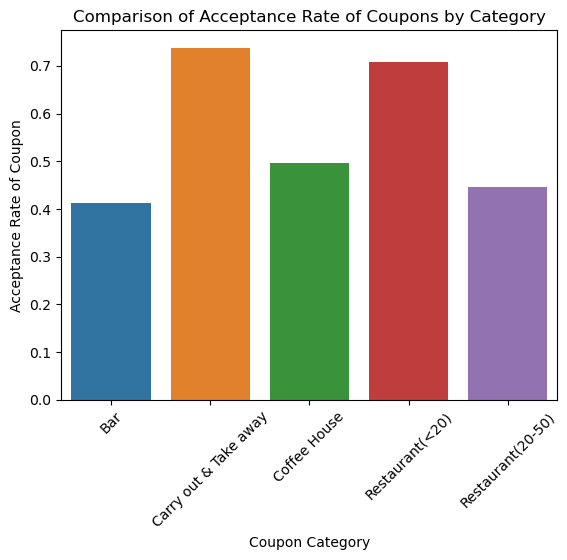

In [19]:
# visualize the overall acc rates

acceptance_rates = [bar_acceptance_rate, takeout_acc_rate, coffee_acc_rate, cheap_acc_rate, expensive_acc_rate]
acceptance_labels = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)']

sns.barplot(x=acceptance_labels, y = acceptance_rates)
plt.xlabel('Coupon Category')
plt.ylabel('Acceptance Rate of Coupon')
plt.xticks(rotation=45)
plt.title('Comparison of Acceptance Rate of Coupons by Category')
plt.show()

We have confirmed that Carry out & Take away coupons have the highest acceptance rate.

We now will investigate the natural follow-up question: "What factors impact acceptance rate of Takeaway coupons?

Let's begin with a very broad brush; let's examine which attributes are correlated with the "Y" indicator.

However, let's not look at every attribute, because that could lead to analysis paralysis. Again, I believe the high acceptance rate for this coupon type is related to convenience, so let's identify those columns, with my hypothesis and why I'm including them.

 - Destination: The urgency of the trip might influence acceptance rates (more urgent, lower acceptance)
 - Passanger: Drivers might be less likely to stop with passangers
 - Weather: Hazardous weather leads to lower acceptance
 - Distance (toCoupon_GEXmin): The closer the destination, the higher the acceptance rate
 - Direction: If same, higher acceptance rate. If opposite direction, lower acceptance rate.
 
For each of these plots, you will see a red line indicating the overall Takeaway acceptance rate, for comparison.

#### Destination

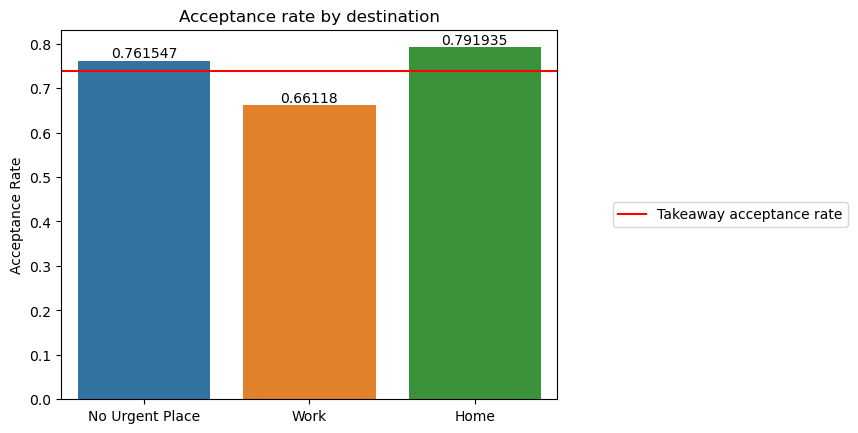

In [20]:
# declare columns relevant to this analysis
columns = ['destination']

# iterate over columns--this is useful for related columns we want to compare all at once

for column in columns:
    temp_bar = sns.barplot(x=column, y="Y", data=takeout_coupons, estimator=np.mean, errorbar=None)
    temp_bar.bar_label(temp_bar.containers[0])
    plt.title(f'Acceptance rate by {column}')
    plt.ylabel('Acceptance Rate')
    plt.xlabel('')
    temp_bar.axhline(y=takeout_acc_rate, color='red', label='Takeaway acceptance rate')
    plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
    plt.show()
    

Clearly destination has some influence on acceptance rate. We can see that the acceptance rate for work is significantly lower than for either "No Urgent Place" or "Home".

#### Passanger

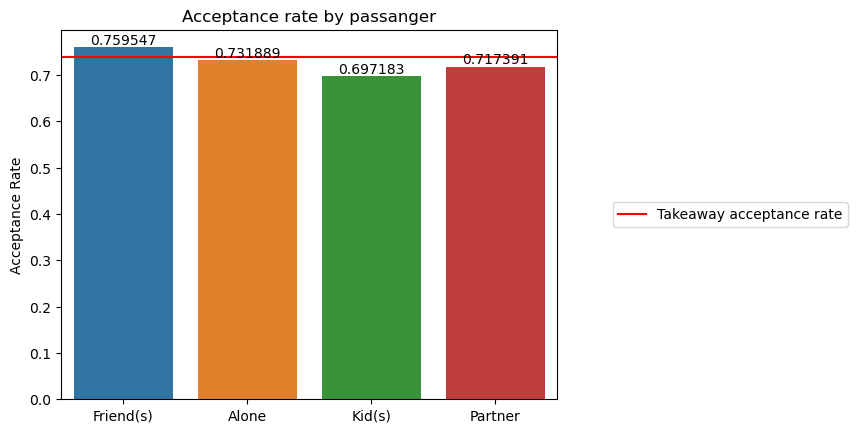

In [21]:
# declare columns relevant to this analysis
columns = ['passanger']

# iterate over columns--this is useful for related columns we want to compare all at once
for column in columns:
    temp_bar = sns.barplot(x=column, y="Y", data=takeout_coupons, estimator=np.mean, errorbar=None)
    temp_bar.bar_label(temp_bar.containers[0])
    plt.title(f'Acceptance rate by {column}')
    plt.ylabel('Acceptance Rate')
    plt.xlabel('')
    temp_bar.axhline(y=takeout_acc_rate, color='red', label='Takeaway acceptance rate')
    plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
    plt.show()
    

Friend(s) is the only value of passanger that exceeds the average, and Kid(s) is the lowest.

The frequencies here interest me, because there must be a heavy weighting of Friend(s) compared to other values, considering it is the only one above average. Let's just do a quick gut check to feel comfortable

In [22]:
pd.DataFrame(takeout_coupons['passanger'].value_counts())

,passanger
Alone,1339
Friend(s),707
Kid(s),142
Partner,92


Looks like Alone, which is close to average, and Friend(s), which is above average, make a heavy majority of the observations, so we can feel more comfortable with the above results

#### Weather

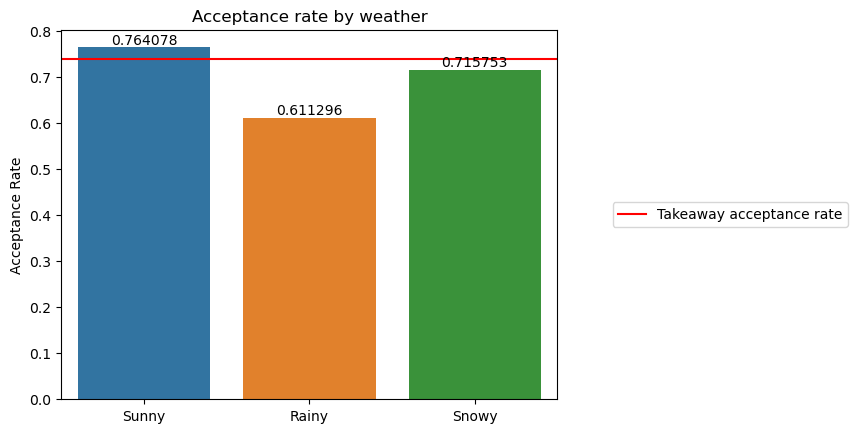

In [23]:
# declare columns relevant to this analysis
columns = ['weather']

# iterate over columns--this is useful for related columns we want to compare all at once
i=0
for column in columns:
    temp_bar = sns.barplot(x=column, y="Y", data=takeout_coupons, estimator=np.mean, errorbar=None)
    temp_bar.bar_label(temp_bar.containers[0])
    plt.title(f'Acceptance rate by {column}')
    plt.ylabel('Acceptance Rate')
    plt.xlabel('')
    temp_bar.axhline(y=takeout_acc_rate, color='red', label='Takeaway acceptance rate')
    i+=1
    
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
plt.show()
    

Really not surprsing--acceptance rates are much, much lower when weather is bad. Somehow Rainy weather seems like even more of a deterrent than Snowy weather! Perhaps this is due to some "noise"--if we don't have many observations with Snowy weather, that is.

In [24]:
pd.DataFrame(takeout_coupons['weather'].value_counts())

,weather
Sunny,1687
Rainy,301
Snowy,292


The Rainy observations are similar in count with Snowy, which means the difference in acceptance rates is probably not due to "noise". There might be some other element or human behavior here we haven't uncovered, given the difference between Snowy (71.5%) and Rainy (61.1%) is a whopping 10% difference.

What if, when it is snowing, the weather is so bad that people don't pick any destination other than something mandatory, like work?

In [25]:
round(pd.crosstab(takeout_coupons['weather'], takeout_coupons['destination'], normalize=True ) * 100, 2)

destination,Home,No Urgent Place,Work
weather,,,
Rainy,1.18,4.82,7.19
Snowy,1.58,7.28,3.95
Sunny,24.43,28.73,20.83


Actually, my guess was wrong. The combo of Snowy and drivers headed to work is smaller than that of Rainy and drivers headed to work.

This remains an open question that we can investigate further at another time.

#### Distance

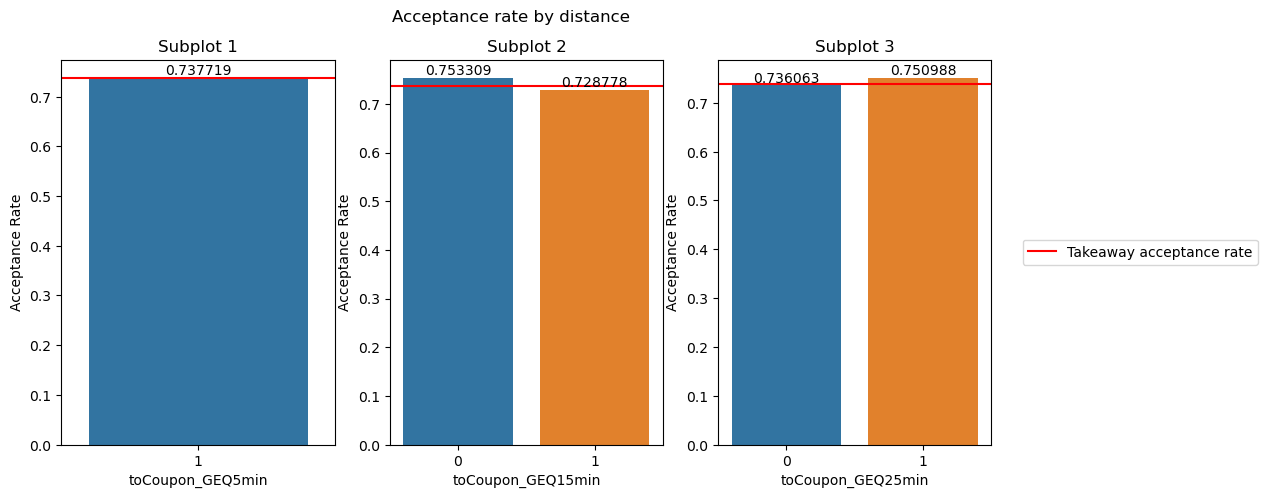

In [26]:
# declare columns relevant to this analysis
columns = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# iterate over columns--this is useful for related columns we want to compare all at once
i=0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
# iterate over columns--this is useful for related columns we want to compare all at once
plt.suptitle('Acceptance rate by distance')
for column in columns:
    temp_bar = sns.barplot(x=column, y="Y", data=takeout_coupons, estimator=np.mean, errorbar=None, ax=axes[i])
    temp_bar.bar_label(temp_bar.containers[0])
    axes[i].set_title(f'Subplot {i+1}')
    temp_bar.set_ylabel('Acceptance Rate')
    temp_bar.set_xlabel(f'{column}')
    temp_bar.axhline(y=takeout_acc_rate, color='red', label='Takeaway acceptance rate')
    i+=1
plt.legend(loc='right', bbox_to_anchor=(2, 0.5))
plt.show()
    

Surprisingly, distance doesn't seem to have a major impact! There is also no consistency in terms of the magnitude of distance.

The acceptance rate is slightly lower than average when the distance is GEQ15 minutes, but slightly higher when the distance is GEQ25min!

This suggests that the distance is not a predicting factor.

<em>Note that we should ignore the results of GEQ5min, as the below analysis shows that there were simply no observations where the Takeaway location was fewer than 5 minutes</em>

In [27]:
pd.DataFrame(takeout_coupons['toCoupon_GEQ5min'].value_counts())

,toCoupon_GEQ5min
1,2280


#### Direction

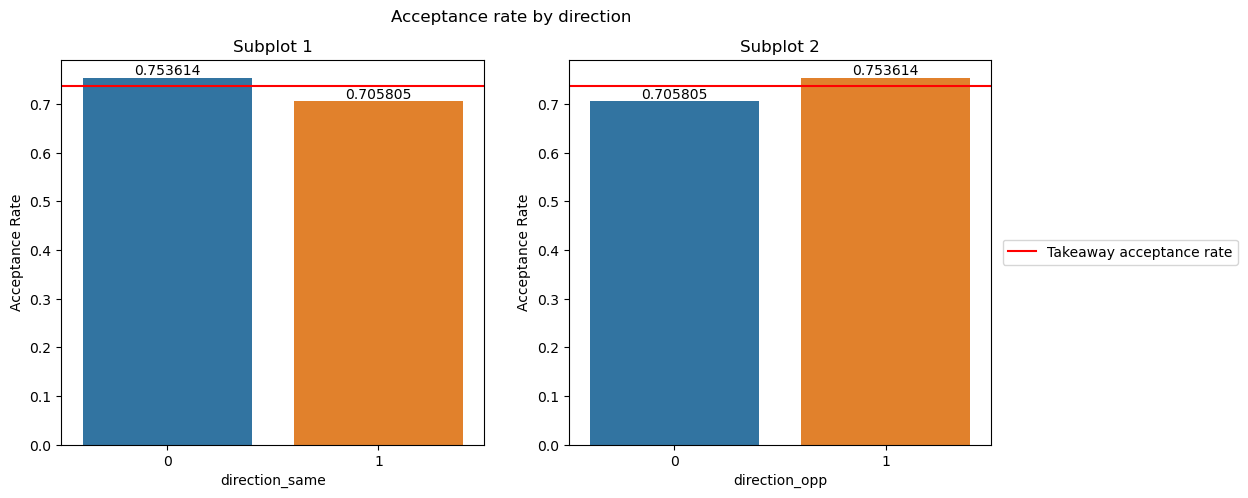

In [28]:
# declare columns relevant to this analysis
columns = ['direction_same', 'direction_opp']

i=0
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# iterate over columns--this is useful for related columns we want to compare all at once
plt.suptitle('Acceptance rate by direction')
for column in columns:
    temp_bar = sns.barplot(x=column, y="Y", data=takeout_coupons, estimator=np.mean, errorbar=None, ax=axes[i])
    temp_bar.bar_label(temp_bar.containers[0])
    axes[i].set_title(f'Subplot {i+1}')
    temp_bar.set_ylabel('Acceptance Rate')
    temp_bar.set_xlabel(f'{column}')
    temp_bar.axhline(y=takeout_acc_rate, color='red', label='Takeaway acceptance rate')
    i+=1
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
plt.show()

Much like with distance, direction defies my expectations in terms of its impact on acceptance rate. In this case, they seem to be <em>negatively</em> correlated! You can see that the acceptance rate is smaller when the Takeaway restaurant is in the same direction, and higher when it is in the opposite direction.

Let's see if there's some interplay with attribute we know have influence on acceptance rate. Note that we only need to look at one of direction_same or direction_opp, given they are mutural exclusive complements.

In [29]:
round(pd.crosstab(takeout_coupons['direction_same'], takeout_coupons['destination'], normalize=True ) * 100, 2)


destination,Home,No Urgent Place,Work
direction_same,,,
0,13.90,40.83,12.02
1,13.29,0.00,19.96


In [30]:
round(pd.crosstab(takeout_coupons['direction_same'], takeout_coupons['passanger'], normalize=True ) * 100, 2)

passanger,Alone,Friend(s),Kid(s),Partner
direction_same,,,,
0,26.67,31.01,6.23,2.85
1,32.06,0.00,0.00,1.18


In [31]:
round(pd.crosstab(takeout_coupons['direction_same'], takeout_coupons['weather'], normalize=True ) * 100, 2)

weather,Rainy,Snowy,Sunny
direction_same,,,
0,8.33,9.08,49.34
1,4.87,3.73,24.65


There might be some confounding coincidences at play here. When the direction of the Takeaway was the same as the driver's direction, there were 0 records of the driver headed to "No Urgent Place" and 0 records of the Driver with Friend(s). We would probably need to resort to statistics to figure out this correlation, but this is a good next step analysis.

#### Other attributes

Our intuition about our self-defined concept of convenience impacting acceptance rate yielded mixed results, we should evaulate some other attributes to determine their impact on acceptance rate.

Note that we can ignore Car, since we earlier determined it did not contain useful values.
I will also omit other columns which I see as not having major relevance (my judgment).

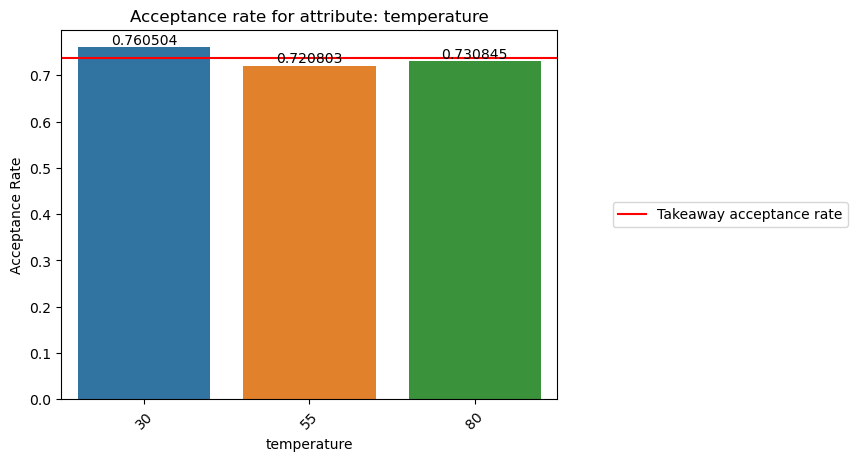

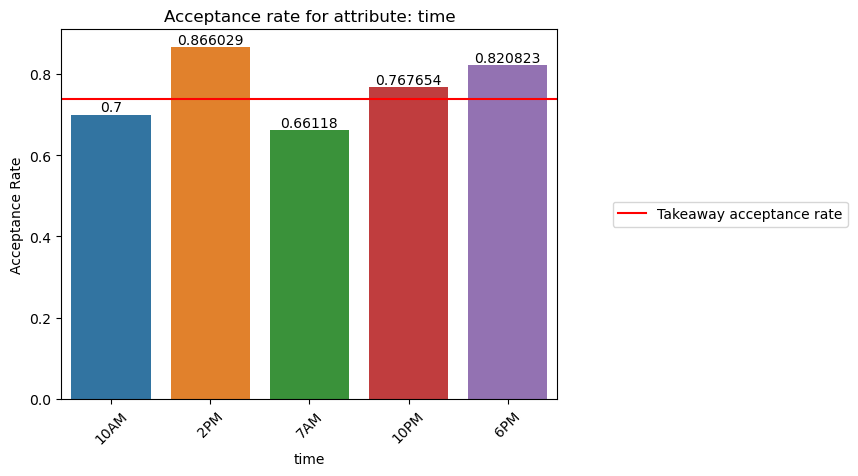

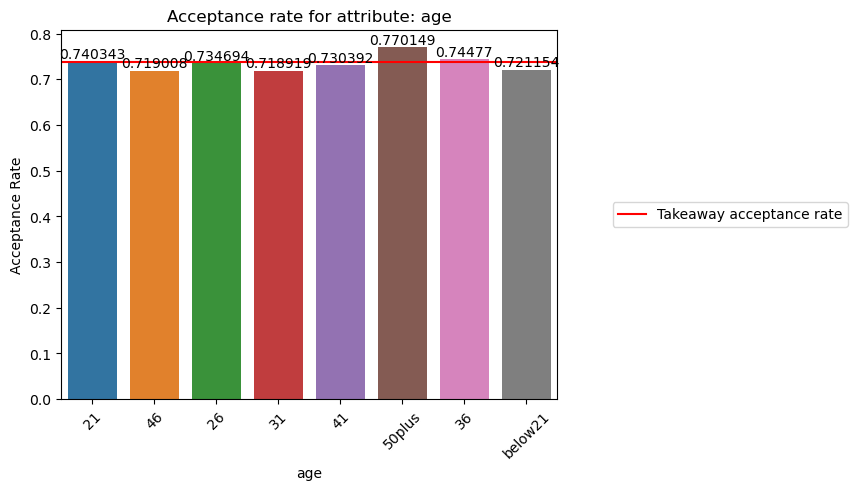

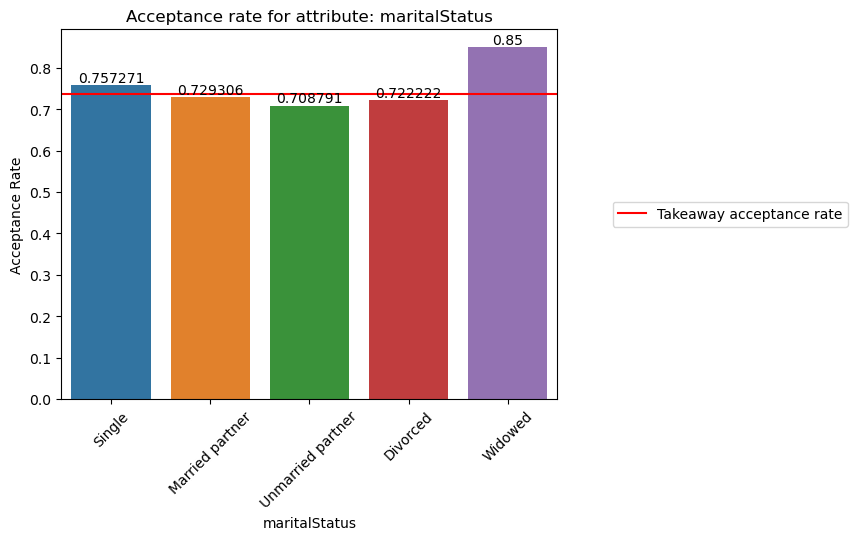

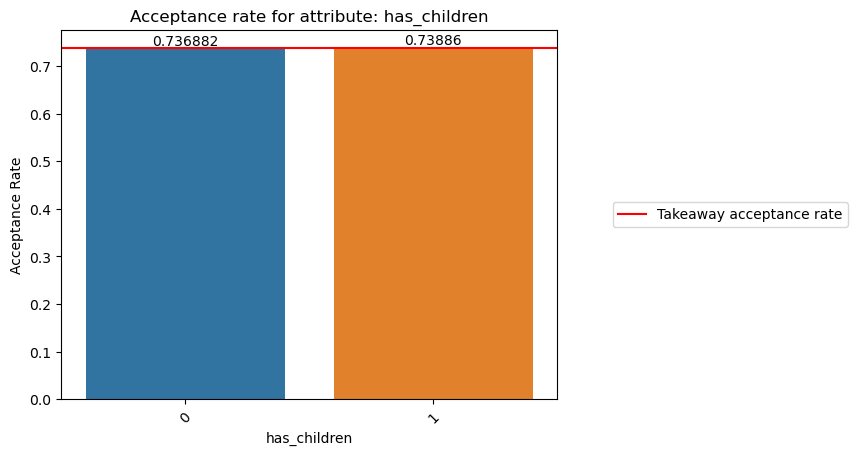

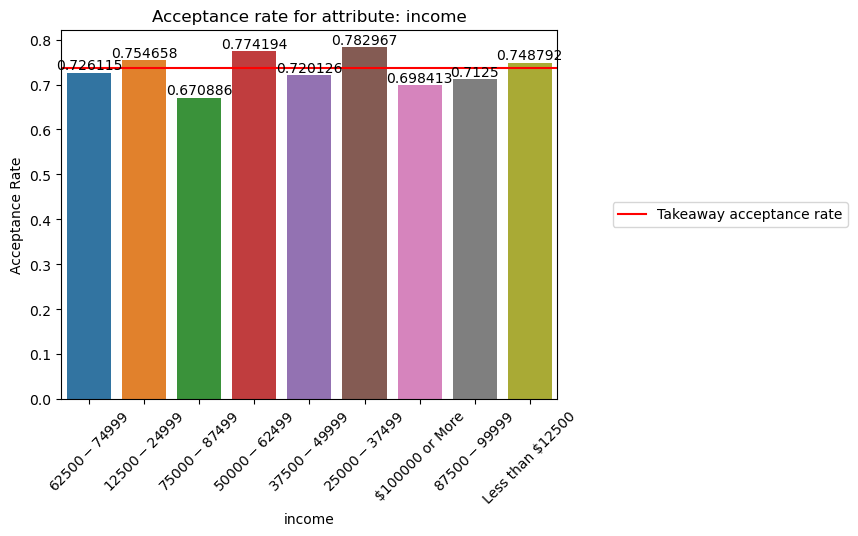

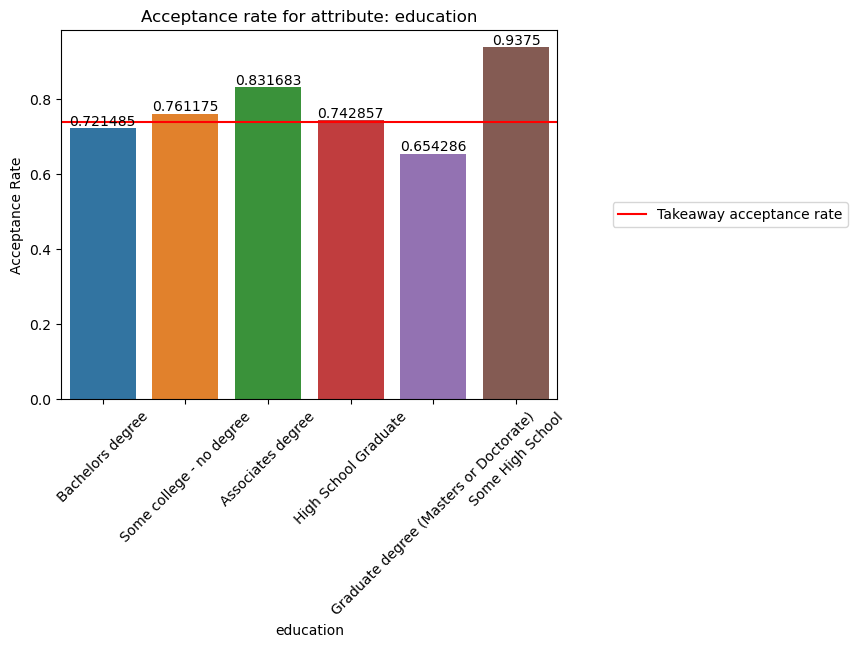

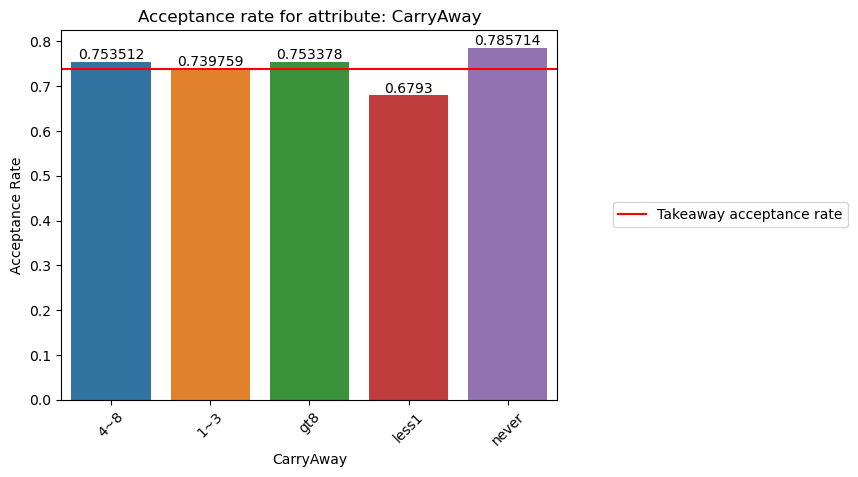

In [39]:
# declare columns relevant to this analysis
columns = ['temperature', 'time', 'age', 'maritalStatus', 'has_children', 'income', 'education', 'CarryAway']

# iterate over columns--this is useful for related columns we want to compare all at once
for column in columns:
    temp_bar = sns.barplot(x=column, y="Y", data=takeout_coupons, estimator=np.mean, errorbar=None)
    temp_bar.bar_label(temp_bar.containers[0])
    plt.title(f'Acceptance rate for attribute: {column}')
    temp_bar.set_ylabel('Acceptance Rate')
    temp_bar.set_xlabel(f'{column}')
    plt.xticks(rotation=45)
    temp_bar.axhline(y=takeout_acc_rate, color='red', label='Takeaway acceptance rate')
    plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
    plt.show()

A few interesting things here! Note that the plots I did not find interesting are not commented on.

<b>Time</b>
Acceptance rates are much lower in the morning, and much higher in the afternoon and evening.
This is consistent with common sense--TakeAway is less common for breakfast, and fewer TakeAway options would be available.

<b>Marital Status</b>
No clear trend, although it was surprising to see such a high value for "widowed". This would definitely warrant a deeper dive in a follow-up analysis.

<b>Has Children</b>
I would have expected that parents would accept the coupon more often, as Takeaway is a convenient way to feed children, but there was almost no difference in acceptance rate between having kids or not having kids.

<b>Income</b>
There seems to be an inverse relationship here. Lower incomes have higher acceptance rates than higher incomes.

<b>Education</b>
Again, education is inversely correlated with acceptance rate. Meaning, acceptance rates were higher with lower levels of education attainment. It's not strictly increasing, but the general trend does exist, with the lowest level ("Some High School") having the highest acceptance rate, and the highest level ("Graduate degree") having the lowest acceptance rate.

<b>CarryAway frequency</b>
In somewhat of a contradiction, those who report that they never do Takeaway were the most likely to accept! A follow-up how many records with this combination actually exist is warranted.

#### Findings

In this analysis, we determined that the coupon type with the highest acceptance rate was Carry out & Take Away, at 73.8%.

I surmised that this was due to the convenient nature of takeaways, relative to the fact that the consumer was already driving in their car.

There seems to be some evidence to support this, given that acceptance rate is much higher when 
 - the consumer is driving Home or Nowhere Urgent
 - weather is good for driving (not hazardous)
 - the driver is with Friend(s), the assumption being that if they are with friends then they are exercising free time and are not in a hurry

On the flip side, I would have expected that same direction and short distances to the Takeaway location would be very heavily correlated with higher acceptance rate, but the results were ambiguous!

#### Next Steps

The analysis of direction and distance really deserves further investigation. I think statistical analysis, and not just exploratory data analysis, is needed to uncover the relationship of these variables with acceptance rate. This makes for a good future project.

There were a few other attributes that I reviewed high-level, but for which I did not perform a deep dive, like income and education. These were not part of my in-depth review because they were not related to my central task at hand, yielded interesting findings regarding their relation to acceptance rate, and merit a deeper dive. These would be good follow-ups if I wanted a comprehensive data exploration.